In [64]:
#loading the train data
import numpy as np
from numpy import genfromtxt
from tqdm import tqdm
import time

In [65]:
#before we begin lets import some of the important functions that we made in the part 1 and use them here

def d1_euc_dist(list1,list2):
    import numpy as np
    if (len(list1)==len(list2)):
        print("\n")
        #print("elements are of equal length, euc dist can be calculated")
    else:
        print("length of paths is not equal")
        return
    diff=(list1-list2)
    power=np.power(diff,2)
    total=np.sum(power)
    result=np.sqrt(total)
    return result

def mink_dist(list1,list2,p):
    """takes a 2d matrix and another 2d matrix and computes a result of distances
    this computes the value of the power p as the minkowski dist"""
    if (list1.shape!=list2.shape):
        print("shapes do not match ip1 :{} and ip2: {}".format(list1.shape,list2.shape))
    diff=(list1-list2)
    power=np.power(diff,p)
    total=np.sum(power, axis=1)
    total=total.reshape((power.shape[0], 1))
    distances=np.power(total,(1/p))
    return distances

def calculateDistances(array2d, array1d,p=2):
    """array 2d is my all training points taken for calculation of distance
    array 1d is the query point with which the distance has to be calculated"""
    #lets broadcast this query to all the points in the train 
    shape_arr1=array2d.shape
    #make ones of the same shape as train data is given
    broadcast_shape=np.ones(shape_arr1,dtype=np.int16)*array1d
    #now calculate the distance between the two arrays
    distances=mink_dist(broadcast_shape,array2d,p)
    #add an index to the distances
    rows=distances.shape[0] #counts froom 0
    index=np.arange(0,rows,1)
    index=index.reshape((index.shape[0], 1))
    #stacking indexes with distances 
    index_dist=np.column_stack((index,distances))
    
    #now sorting the arrays based on 1st axis
    index_dist=index_dist[index_dist[:,1].argsort()]
    """returning the index value of the distance that can be used to look for the vector
    also returning the distance"""
    index=index_dist[:,0]
    #distances=index_dist[:,1]
    #shortest distances on the top
    return index, distances

def r2score(y_true,y_pred):
    """compares elements in both the arrays if they are same then its a match oterwise, No match
    return acc_score defined as total matches upon the elements present"""
    #since both of them are col vectors
    #we can take the row size as total number of elements
    y_true_mean=np.mean(y_true)
    ss_total=np.sum(np.power((y_true-y_true_mean),2))#might need broadcasting
    ss_residual=np.sum(np.power((y_true-y_pred),2))
    print(ss_residual,ss_total)
    return 1-(ss_residual/ss_total)

def slice_k(k,indexes,distances):
    """slices top k elements from index and distances"""
    rows=indexes.shape[0]
    indexes=indexes.reshape(rows,1)
    k_indexes=indexes[:k]#select top k rows
    k_distances=distances[:k]
    return k_indexes, k_distances

def weighted_regressor(distances,indexes,x_train,weight_penalty):
    """computes the weighted avergage and returns a prediction as label"""
    row,col=distances.shape
    dist_based_x_train=[]
    for element in indexes:#for every element in the shortest k distance selected
        element=int(element)
        dist_based_x_train.append(x_train[element])#look for these index in x_train
    dist_based_x_train=np.asarray(dist_based_x_train)
    distances=np.power(distances,weight_penalty)
    weight=np.divide(np.ones((row,col)),distances)###these are my weights
    row=dist_based_x_train.shape[0]
    dist_based_x_train=dist_based_x_train.reshape(row,1)
    weight_X_x_train=np.multiply(dist_based_x_train,weight)
    weight_X_x_train=np.sum(weight_X_x_train)
    label=weight_X_x_train/np.sum(weight)
    return label
    

  2%|▏         | 30/1600 [00:00<00:05, 273.90it/s]

knn calculating..... for k= 1


  2%|▏         | 35/1600 [00:00<00:04, 341.23it/s]

14594300.707810711 44828711.24895885
the r2 score is :67.4443000898232


knn calculating..... for k= 2


  2%|▏         | 36/1600 [00:00<00:04, 352.91it/s]

9545898.53182882 44828711.24895885
the r2 score is :78.70583769670486


knn calculating..... for k= 3


  2%|▎         | 40/1600 [00:00<00:03, 394.59it/s]

8309297.741501026 44828711.24895885
the r2 score is :81.46433946014004


knn calculating..... for k= 4


  2%|▏         | 34/1600 [00:00<00:04, 335.21it/s]

7589380.647548835 44828711.24895885
the r2 score is :83.07026805789538


knn calculating..... for k= 5


  2%|▏         | 39/1600 [00:00<00:04, 387.36it/s]

7292863.506108427 44828711.24895885
the r2 score is :83.73171277307732


knn calculating..... for k= 6


  2%|▏         | 35/1600 [00:00<00:04, 343.75it/s]

7161602.26287663 44828711.24895885
the r2 score is :84.02451896708727


knn calculating..... for k= 7


  2%|▏         | 38/1600 [00:00<00:04, 375.11it/s]

7169235.678329203 44828711.24895885
the r2 score is :84.00749100612231


knn calculating..... for k= 8


  2%|▏         | 39/1600 [00:00<00:04, 380.74it/s]

7067666.999858999 44828711.24895885
the r2 score is :84.23406160260039


knn calculating..... for k= 9


  2%|▏         | 31/1600 [00:00<00:05, 303.84it/s]

7044311.6727834735 44828711.24895885
the r2 score is :84.28616064008068


knn calculating..... for k= 10


  2%|▏         | 39/1600 [00:00<00:04, 388.67it/s]

6973449.014616473 44828711.24895885
the r2 score is :84.44423491032562


knn calculating..... for k= 11


  2%|▎         | 40/1600 [00:00<00:03, 393.46it/s]

6967451.069271813 44828711.24895885
the r2 score is :84.45761460645686


knn calculating..... for k= 12


  2%|▏         | 37/1600 [00:00<00:04, 361.51it/s]

6986679.683990579 44828711.24895885
the r2 score is :84.41472108089468


knn calculating..... for k= 13


  2%|▏         | 35/1600 [00:00<00:04, 349.19it/s]

7127978.387391269 44828711.24895885
the r2 score is :84.09952419152621


knn calculating..... for k= 14


  2%|▏         | 39/1600 [00:00<00:04, 388.39it/s]

7184747.943505189 44828711.24895885
the r2 score is :83.9728875907133


knn calculating..... for k= 15


  2%|▏         | 35/1600 [00:00<00:04, 347.31it/s]

7316041.9195617875 44828711.24895885
the r2 score is :83.68000837915744


knn calculating..... for k= 16


  2%|▏         | 34/1600 [00:00<00:04, 335.63it/s]

7370772.1744810045 44828711.24895885
the r2 score is :83.55792087453285


knn calculating..... for k= 17


  2%|▏         | 34/1600 [00:00<00:04, 337.64it/s]

7431828.214424534 44828711.24895885
the r2 score is :83.42172235746095


knn calculating..... for k= 18


  2%|▏         | 37/1600 [00:00<00:04, 369.53it/s]

7479718.666864818 44828711.24895885
the r2 score is :83.31489249082856


knn calculating..... for k= 19


  2%|▏         | 38/1600 [00:00<00:04, 374.48it/s]

7557536.095990091 44828711.24895885
the r2 score is :83.14130412088166


knn calculating..... for k= 20


  2%|▏         | 34/1600 [00:00<00:04, 332.87it/s]

7614543.271132414 44828711.24895885
the r2 score is :83.01413746015449


knn calculating..... for k= 21


  2%|▏         | 32/1600 [00:00<00:05, 312.93it/s]

7658558.816679109 44828711.24895885
the r2 score is :82.915951399658


knn calculating..... for k= 22


  2%|▏         | 38/1600 [00:00<00:04, 373.68it/s]

7678609.370801935 44828711.24895885
the r2 score is :82.87122436297949


knn calculating..... for k= 23


  2%|▏         | 36/1600 [00:00<00:04, 352.28it/s]

7736593.521936633 44828711.24895885
the r2 score is :82.74187834896478


knn calculating..... for k= 24


  2%|▏         | 32/1600 [00:00<00:04, 318.77it/s]

7807465.182120647 44828711.24895885
the r2 score is :82.58378399780125


knn calculating..... for k= 25


  2%|▏         | 38/1600 [00:00<00:04, 372.79it/s]

7832376.009384875 44828711.24895885
the r2 score is :82.5282150854453


knn calculating..... for k= 26


  2%|▏         | 33/1600 [00:00<00:04, 327.35it/s]

7906452.533074034 44828711.24895885
the r2 score is :82.3629716028081


knn calculating..... for k= 27


  2%|▏         | 39/1600 [00:00<00:04, 381.08it/s]

7951720.265600609 44828711.24895885
the r2 score is :82.2619922722287


knn calculating..... for k= 28


  2%|▏         | 39/1600 [00:00<00:04, 389.08it/s]

7982043.6887306115 44828711.24895885
the r2 score is :82.19434941057781


knn calculating..... for k= 29


100%|██████████| 1600/1600 [00:04<00:00, 374.13it/s]


8027070.370274211 44828711.24895885
the r2 score is :82.09390779561917


total time taken by knn is :131.26940178871155
[67.4443000898232, 78.70583769670486, 81.46433946014004, 83.07026805789538, 83.73171277307732, 84.02451896708727, 84.00749100612231, 84.23406160260039, 84.28616064008068, 84.44423491032562, 84.45761460645686, 84.41472108089468, 84.09952419152621, 83.9728875907133, 83.68000837915744, 83.55792087453285, 83.42172235746095, 83.31489249082856, 83.14130412088166, 83.01413746015449, 82.915951399658, 82.87122436297949, 82.74187834896478, 82.58378399780125, 82.5282150854453, 82.3629716028081, 82.2619922722287, 82.19434941057781, 82.09390779561917]


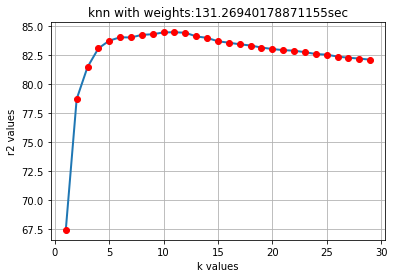

maximum r2 value is 84.45761460645686 at 10th run
the best k value is:11, and the r2 val is 84.45761460645686


In [66]:
my_data = genfromtxt('trainingData.csv', delimiter=',')
#upon loading we found that the data has total 13 cols starting from 1 as the 1st col
#or you can say 12 cols starting from 0 as the 1st col
y_train=my_data[:,12]# this prints the labels
x_train=my_data[:,:-1] #every row except the last row until last col



#for test data
from numpy import genfromtxt
my_data = genfromtxt('testData.csv', delimiter=',')
y_test=my_data[:,12]#thirteenth col
x_test=my_data[:,:-1]


import time
tic=time.time()
k_ranges_weight=[]
accuracy_ranges_weight=[]

for k in range(1,30):
    y_test_predicted=[]
    print("="*50)
    print("knn calculating..... for k= {}".format(k))

    for element in tqdm(x_test):
        indexes,distances=calculateDistances(x_train, element)
        #print(distances.shape)
        indexes,distances=slice_k(k,indexes,distances)
        label=weighted_regressor(distances,indexes,y_train,1)
        y_test_predicted.append(label)

    y_test_predicted=np.asarray(y_test_predicted)##y_predicted is my predictions

    
    acc=r2score(y_test,y_test_predicted)*100 ####<<<<< r2 metric
    print("the r2 score is :{}".format(acc))
    print("="*50)
    print("\n") 
    k_ranges_weight.append(k)
    accuracy_ranges_weight.append(acc)

toc=time.time()
weighted_knn_time=toc-tic
print("total time taken by knn is :{}".format(weighted_knn_time))

############graph plotting#########################################
print(accuracy_ranges_weight)
#plotting graphs with matplot lib
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(k_ranges_weight, accuracy_ranges_weight, linewidth=2)
plt.plot(k_ranges_weight, accuracy_ranges_weight, 'ro')
plt.axis('tight')
plt.grid()
plt.xlabel('k values')
plt.ylabel('r2 values')
plt.title("knn with weights:{}sec".format(weighted_knn_time))
plt.show()
ind=accuracy_ranges_weight.index(max(accuracy_ranges_weight))
print("maximum r2 value is {} at {}th run".format(max(accuracy_ranges_weight),ind))
best_k_weight=k_ranges_weight[ind]
print("the best k value is:{}, and the r2 val is {}".format(best_k_weight,accuracy_ranges_weight[ind]))



Observation: as we can see that KNN based approaches can actually perform better than baseline which always predicts mean of true labels, but still lacks from a perfect model, because we got r2 value as .84 or 84.45 when converted into 100 scale.

this value lies between 0 and 100 hence its actually 84% better than the baseline model.

# Problem with euclidean distance as measure 

as explained in the pdf we know euclidean measure is not the best measure, as the feature with bigger range dominates the feature with smaller hence we have to use col standardization that equally scales features proportitional and shifting the centre to the origin 

In this demonstration I am allowed to tackle the problem <b>with high level libraries</b> so I will use standardization now from sk learn.
to see it's impact on the r2 metric

how is standardization different from normalization ?

read here - https://stats.stackexchange.com/questions/10289/whats-the-difference-between-normalization-and-standardization

  0%|          | 0/1600 [00:00<?, ?it/s]

knn calculating..... for k= 1


  2%|▎         | 40/1600 [00:00<00:03, 394.17it/s]

14594300.707810711 44828711.24895885
the r2 score is :67.4443000898232


knn calculating..... for k= 2


  2%|▏         | 33/1600 [00:00<00:04, 327.29it/s]

9545898.53182882 44828711.24895885
the r2 score is :78.70583769670486


knn calculating..... for k= 3


  2%|▏         | 38/1600 [00:00<00:04, 375.28it/s]

8309297.741501026 44828711.24895885
the r2 score is :81.46433946014004


knn calculating..... for k= 4


  2%|▏         | 38/1600 [00:00<00:04, 368.42it/s]

7589380.647548835 44828711.24895885
the r2 score is :83.07026805789538


knn calculating..... for k= 5


  2%|▏         | 38/1600 [00:00<00:04, 371.59it/s]

7292863.506108427 44828711.24895885
the r2 score is :83.73171277307732


knn calculating..... for k= 6


  2%|▏         | 38/1600 [00:00<00:04, 371.83it/s]

7161602.26287663 44828711.24895885
the r2 score is :84.02451896708727


knn calculating..... for k= 7


  2%|▏         | 36/1600 [00:00<00:04, 354.87it/s]

7169235.678329203 44828711.24895885
the r2 score is :84.00749100612231


knn calculating..... for k= 8


  2%|▏         | 39/1600 [00:00<00:04, 384.22it/s]

7067666.999858999 44828711.24895885
the r2 score is :84.23406160260039


knn calculating..... for k= 9


  2%|▏         | 38/1600 [00:00<00:04, 374.37it/s]

7044311.6727834735 44828711.24895885
the r2 score is :84.28616064008068


knn calculating..... for k= 10


  2%|▏         | 36/1600 [00:00<00:04, 353.90it/s]

6973449.014616473 44828711.24895885
the r2 score is :84.44423491032562


knn calculating..... for k= 11


  2%|▏         | 32/1600 [00:00<00:04, 319.66it/s]

6967451.069271813 44828711.24895885
the r2 score is :84.45761460645686


knn calculating..... for k= 12


  2%|▏         | 36/1600 [00:00<00:04, 357.03it/s]

6986679.683990579 44828711.24895885
the r2 score is :84.41472108089468


knn calculating..... for k= 13


  2%|▏         | 35/1600 [00:00<00:04, 349.98it/s]

7127978.387391269 44828711.24895885
the r2 score is :84.09952419152621


knn calculating..... for k= 14


  2%|▎         | 40/1600 [00:00<00:03, 399.64it/s]

7184747.943505189 44828711.24895885
the r2 score is :83.9728875907133


knn calculating..... for k= 15


  2%|▏         | 39/1600 [00:00<00:04, 381.93it/s]

7316041.9195617875 44828711.24895885
the r2 score is :83.68000837915744


knn calculating..... for k= 16


  2%|▎         | 40/1600 [00:00<00:03, 397.15it/s]

7370772.1744810045 44828711.24895885
the r2 score is :83.55792087453285


knn calculating..... for k= 17


  2%|▎         | 40/1600 [00:00<00:03, 399.09it/s]

7431828.214424534 44828711.24895885
the r2 score is :83.42172235746095


knn calculating..... for k= 18


  2%|▏         | 34/1600 [00:00<00:04, 332.07it/s]

7479718.666864818 44828711.24895885
the r2 score is :83.31489249082856


knn calculating..... for k= 19


100%|██████████| 1600/1600 [00:04<00:00, 360.54it/s]


7557536.095990091 44828711.24895885
the r2 score is :83.14130412088166


total time taken by knn is :85.80961799621582
[67.4443000898232, 78.70583769670486, 81.46433946014004, 83.07026805789538, 83.73171277307732, 84.02451896708727, 84.00749100612231, 84.23406160260039, 84.28616064008068, 84.44423491032562, 84.45761460645686, 84.41472108089468, 84.09952419152621, 83.9728875907133, 83.68000837915744, 83.55792087453285, 83.42172235746095, 83.31489249082856, 83.14130412088166]


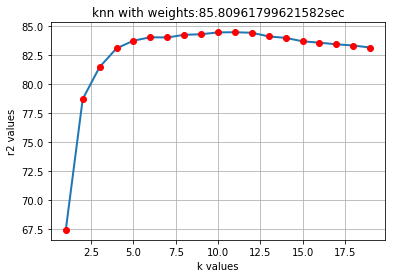

maximum r2 value is 84.45761460645686 at 10th run
the best k value is:11, and the r2 val is 84.45761460645686


In [67]:
my_data = genfromtxt('trainingData.csv', delimiter=',')

y_train=my_data[:,12]# this prints the labels
x_train=my_data[:,:-1] #every row except the last row until last col

####std#########################
#standardization does not help turn this off
#from sklearn.preprocessing import StandardScaler
#x_train = StandardScaler().fit_transform(x_train)
############################

#for test data
from numpy import genfromtxt
my_data = genfromtxt('testData.csv', delimiter=',')
y_test=my_data[:,12]#thirteenth col
x_test=my_data[:,:-1]

############################
#from sklearn.preprocessing import StandardScaler
#x_test = StandardScaler().fit_transform(x_test)
#############################

import time
tic=time.time()
k_ranges_weight=[]
accuracy_ranges_weight=[]

for k in range(1,20):
    y_test_predicted=[]
    print("="*50)
    print("knn calculating..... for k= {}".format(k))

    for element in tqdm(x_test):
        indexes,distances=calculateDistances(x_train, element)
        #print(distances.shape)
        indexes,distances=slice_k(k,indexes,distances)
        label=weighted_regressor(distances,indexes,y_train,1)
        y_test_predicted.append(label)

    y_test_predicted=np.asarray(y_test_predicted)##y_predicted is my predictions

    
    acc=r2score(y_test,y_test_predicted)*100 ####<<<<< r2 metric
    print("the r2 score is :{}".format(acc))
    print("="*50)
    print("\n") 
    k_ranges_weight.append(k)
    accuracy_ranges_weight.append(acc)

toc=time.time()
weighted_knn_time=toc-tic
print("total time taken by knn is :{}".format(weighted_knn_time))

############graph plotting#########################################
print(accuracy_ranges_weight)
#plotting graphs with matplot lib
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(k_ranges_weight, accuracy_ranges_weight, linewidth=2)
plt.plot(k_ranges_weight, accuracy_ranges_weight, 'ro')
plt.axis('tight')
plt.grid()
plt.xlabel('k values')
plt.ylabel('r2 values')
plt.title("knn with weights:{}sec".format(weighted_knn_time))
plt.show()
ind=accuracy_ranges_weight.index(max(accuracy_ranges_weight))
print("maximum r2 value is {} at {}th run".format(max(accuracy_ranges_weight),ind))
best_k_weight=k_ranges_weight[ind]
print("the best k value is:{}, and the r2 val is {}".format(best_k_weight,accuracy_ranges_weight[ind]))


# Scikit's implementation is extremely fast , much much better than mine

In [68]:
from numpy import genfromtxt
import time
from tqdm import tqdm 
my_data = genfromtxt('trainingData.csv', delimiter=',')

y_train=my_data[:,12]# this prints the labels
x_train=my_data[:,:-1] #every row except the last row until last col
####std#########################
from sklearn.preprocessing import StandardScaler
#x_train = StandardScaler().fit_transform(x_train)  ##<<<<<<<<<turn this is off if want no std
############################
my_data = genfromtxt('testData.csv', delimiter=',')
y_test=my_data[:,12]#thirteenth col
x_test=my_data[:,:-1]
############################
from sklearn.preprocessing import StandardScaler
#x_test = StandardScaler().fit_transform(x_test) ##<<<<<<<<<turn this is off if want no std
#############################

100%|██████████| 29/29 [00:06<00:00,  4.29it/s]


max accuracy :0.8484817441980318
[0.6744430008982321, 0.7902143377949231, 0.8185732982178427, 0.8346705683318565, 0.8405938933146834, 0.8439095319970109, 0.8442804836302874, 0.846701598549625, 0.8474151167266731, 0.8484817441980318, 0.8477567718213751, 0.8468957955262624, 0.8446665992245065, 0.8433228110455488, 0.8405570740905184, 0.8395088947165066, 0.8378018679249395, 0.8369006708231007, 0.8356787784844375, 0.834053193786899, 0.8332677393464014, 0.8328223285594196, 0.8318520617824241, 0.8304342577481169, 0.8298701957850334, 0.8283871656751032, 0.827520966156115, 0.8269367377929944, 0.8261229571136108]


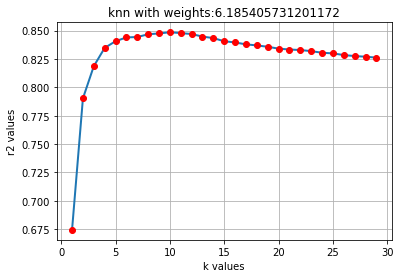

maximum r2 value is 0.8484817441980318 at 9th run
the best k value is:10, and the r2 val is 0.8484817441980318


In [69]:
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
accuracy_cv=[]
k_values=[]
tic=time.time()
for i in tqdm(range(1,30)): #for all possible k values check accuracy on k_cv
    # instantiate learning model (k = 30)
    knn = KNeighborsRegressor(n_neighbors=i,weights="distance",algorithm="kd_tree") #######change this to kd_tree or brute

    # fitting the model on crossvalidation train
    knn.fit(x_train, y_train)

    # predict the response on the crossvalidation train
    pred = knn.predict(x_test)

    # evaluate CV accuracy
    acc = r2_score(y_test, pred)
    
    #print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    k_values.append(i)
    accuracy_cv.append(acc)
    
print("max accuracy :{}".format(max(accuracy_cv)))
toc=time.time()
time_scikit=toc-tic
print(accuracy_cv)
#plotting graphs with matplot lib
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(k_values, accuracy_cv, linewidth=2)
plt.plot(k_values, accuracy_cv, 'ro')
plt.axis('tight')
plt.grid()
plt.xlabel('k values')
plt.ylabel('r2 values')
plt.title("knn with weights:{}".format(time_scikit))
plt.show()
ind=accuracy_cv.index(max(accuracy_cv))
print("maximum r2 value is {} at {}th run".format(max(accuracy_cv),ind))
best_k_weight=k_values[ind]
print("the best k value is:{}, and the r2 val is {}".format(best_k_weight,accuracy_cv[ind]))

In [70]:
#in out example standardization didn't help us  in increasing the accuracy in anyway. 

# time complexity analysis of kd-tree and KNN

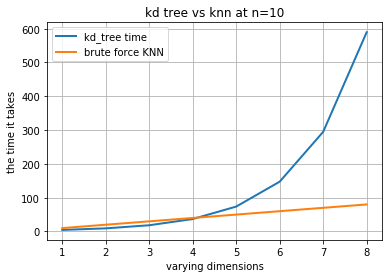

In [71]:
### in the scikit learn's implementation you can change the aLGORITHM from brute to kd_tree if you want to try and see the run time
#apply Kd tree change algorithm to kd_tree from brute
#this section plots the time complexity difference between kd and normal knn approach
import math
a=list(range(1,9))
n=10
calc=[]
calc2=[]
for ele1 in a:
    new=(2**ele1)*math.log(n)
    calc.append(new)
    new=n*ele1
    calc2.append(new)
    


#plotting graphs with matplot lib
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(a,calc , linewidth=2)
plt.plot(a, calc2, linewidth=2)
plt.axis('tight')
plt.legend(["kd_tree time","brute force KNN"])
plt.grid()
plt.xlabel('varying dimensions')
plt.ylabel('the time it takes')
plt.title("kd tree vs knn at n=10")
plt.show()

# turn the below line of code to be off it tries apply pca before features and then tries to run kd-tree on top of that, we got lower accuracy hence we will not ue this

from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from numpy import genfromtxt
import time
from tqdm import tqdm 
import numpy as np
import seaborn as sn #adds more visual colors
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

################################### loading data and standardizing it #############################
my_data = genfromtxt('trainingData.csv', delimiter=',')

y_train=my_data[:,12]# this prints the labels
x_train=my_data[:,:-1] #every row except the last row until last col
####std#########################
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(x_train)  ##<<<<<<<<<turn this is off if want no std
############################
my_data = genfromtxt('testData.csv', delimiter=',')
y_test=my_data[:,12]#thirteenth col
x_test=my_data[:,:-1]
############################
from sklearn.preprocessing import StandardScaler
x_test = StandardScaler().fit_transform(x_test) ##<<<<<<<<<turn this is off if want no std
#############################


################################### implementing PCA and reducing dimensions#############################
#######pca plotting put here

##########
pca.n_components = 8
x_test = pca.fit_transform(x_test)
x_train = pca.fit_transform(x_train)
print(x_train.shape,x_test.shape)
#display(pca.explained_variance_.shape)
#explained variance gives all the eigen vectors in a col format  
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)
#do a cumlative sum
 
# Plot the PCA spectrum #this will show exactly how many features are required to represent the variance of data 
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.title("variance spread vs components")
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()



################################### running KNN using scikit learn#############################
accuracy_cv=[]
k_values=[]
tic=time.time()
for i in tqdm(range(1,30)): #for all possible k values check accuracy on k_cv
    # instantiate learning model (k = 30)
    knn = KNeighborsRegressor(n_neighbors=i,weights="distance",algorithm="brute")

    # fitting the model on crossvalidation train
    
    knn.fit(x_train, y_train)

    # predict the response on the crossvalidation train
    pred = knn.predict(x_test)

    # evaluate CV accuracy
    acc = r2_score(y_test, pred)
    
    #print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    k_values.append(i)
    accuracy_cv.append(acc)
    
print("max accuracy :{}".format(max(accuracy_cv)))
toc=time.time()
time_scikit=toc-tic
print(accuracy_cv)
#plotting graphs with matplot lib
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(k_values, accuracy_cv, linewidth=2)
plt.plot(k_values, accuracy_cv, 'ro')
plt.axis('tight')
plt.grid()
plt.xlabel('k values')
plt.ylabel('r2 values')
plt.title("knn with weights:{}".format(time_scikit))
plt.show()
ind=accuracy_cv.index(max(accuracy_cv))
print("maximum r2 value is {} at {}th run".format(max(accuracy_cv),ind))
best_k_weight=k_values[ind]
print("the best k value is:{}, and the r2 val is {}".format(best_k_weight,accuracy_cv[ind]))    
